# Classifying Flower Species Using a K-Nearest Neighbors (kNN)&nbsp;Model

## Project objectives

- Build a machine-learning model based on data about flowers, with features such as sepal width as independent variables and flower species as target variables.

- Determine how accurately the model can predict the species of an unknown flower.

In [1]:
# Importing a Bunch object as data

from sklearn.datasets import load_iris

ds = load_iris()

In [2]:
# Printing the keys in the data set

ds.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(ds.DESCR[:485] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
  
...


In [4]:
# Printing the unique target variables

ds.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
# Printing the names of the features into which the data is organized 

ds.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# Printing the first five rows of the data

ds.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
# Converting the data set into a pandas data frame using a custom function

import pandas as pd

def ds_to_df(ds):
    '''
    Converts an scikit-learn data set into a data frame
    '''
    df = pd.DataFrame(ds.data, columns=ds.feature_names)
    df['target'] = pd.Series(ds.target)
    return df

In [8]:
df = ds_to_df(ds)

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
# Separating the independent and target variables

X = df.drop('target', axis=1)
y = df.target.copy()

In [11]:
# Splitting the data for training and validation

seed = 0

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [13]:
# Preparing to understand the data better through graphs

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

plt.style.use('fivethirtyeight')

In [14]:
# Combining the training data and labels so as to create a pair plot

combined_train = pd.concat([X_train, y_train], axis=1)

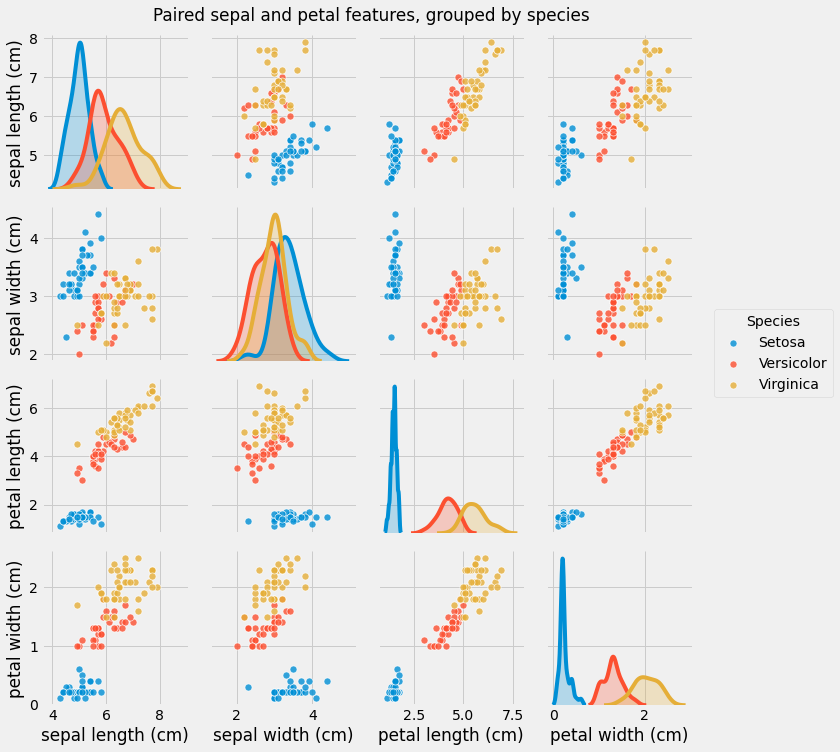

In [15]:
g = sns.pairplot(combined_train, hue='target', plot_kws={"s": 50, 'alpha':0.8})

g._legend.remove()
    
leg = plt.legend([ds.target_names[i].capitalize() for i in range(len(ds.target_names))],\
           bbox_to_anchor=(1.1, 1.5))
leg.set_title('Species')

g.fig.suptitle('Paired sepal and petal features, grouped by species', y=1.025);

The three specifies are easily distinguishable in most the paired plots. So, a model should be able to readily identify species based on measurements.

In [16]:
# Instantiating a kNN model with 1 neighbor

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

In [17]:
# Building a model based on the training data

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [18]:
# Preparing to predict the species based on the sepal and petal measurements of 
# a flower that is unknown to the model

import numpy as np

flower_new = np.array([[5, 2.9, 1, 0.2]])

flower_new.shape

(1, 4)

In [19]:
# Obtaining a prediction

prediction = knn.predict(flower_new)

print(f'Prediction: {prediction}')
print(f'The species that corresponds to the predicted code: {ds.target_names[prediction][0].capitalize()}')

Prediction: [0]
The species that corresponds to the predicted code: Setosa


In [20]:
# Using the validation data to evaluate the prediction accuracy of the model

y_pred = knn.predict(X_test)

print(f'Accuracy %: {np.mean(y_pred == y_test):.2f}')

Accuracy %: 0.97


In [21]:
# Using an alternative way to calculate the accuracy score of the model

print(f'Accuracy %: {knn.score(X_test, y_test):.2f}')

Accuracy %: 0.97
